In [341]:
import cv2 
import numpy as np
import platform 

if platform.system() =="Windows" or platform.system() =="linux": # MacOS: posix
    import matplotlib.pylab as plt
    
import math 
from function import Region
from function import Contour
from function import Image
from function import CalcTime
import dis
import numba 
import time

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")
    
def timer(func):
    def wrapper( *args, **kwargs):
        t0 = time.time()
        result = func(*args, **kwargs)
        t1 =time.time()
        print(f'Function {func.__name__} took: {round((t1-t0)*1000, 6)} (ms)')
        return result
    return wrapper 
def SelectShape(threshold,min_value, max_value, feature = "width"): 
    
        number_object,labels , stats, _ = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
        
        list_x      =  list(stats[1: ,0])
        list_y      =  list(stats[1: ,1])
        list_width  = list(stats[1: ,2])
        list_height = list(stats[1: ,3])
        list_area   = list(stats[1: ,4])
        
        #
        result = np.zeros((threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
        # 
        list_out_x = []
        list_out_y = []
        list_output_width = []
        list_output_height = []
        list_output_area =[]
        #
        list_region  = []
        # ----------------------------------------------------- WIDTH
        if feature == "width":
            for idx in numba.prange(1,number_object):
                x = list_x[idx -1]
                y = list_y[idx-1]
                width  = list_width[idx -1]
                height = list_height[idx -1]
                area   = list_area[idx -1]
                
                if width > min_value  and width < max_value:
                    #select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                    
                    #select_object[labels == idx] = 255
                    #select_object[labels != idx] = 0
                    
                    #list_region.append(select_object)
                    #result = cv2.bitwise_or(result,select_object)
                    list_out_x.append(x)
                    list_out_y.append(y)
                    list_output_width.append(width)
                    list_output_height.append(height)
                    list_output_area.append(area)
                    
            return (list_out_x, list_out_y,list_output_width,list_output_height , list_output_area)
        
        # ----------------------------------------------------- HEIGHT 
        elif feature == "height":
            for idx in numba.prange(1,number_object):
                width  = list_width[idx -1]
                height = list_height[idx -1]
                area   = list_area[idx -1]
                x = list_x[idx -1]
                y = list_y[idx-1]
                if height > min_value  and height < max_value:
                    # select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                    
                    # select_object[labels == idx] = 255
                    # select_object[labels != idx] = 0
                    
                    # list_region.append(select_object)
                    
                    # result = cv2.bitwise_or(result,select_object)
                    list_out_x.append(x)
                    list_out_y.append(y)
                    list_output_width.append(width)
                    list_output_height.append(height)
                    list_output_area.append(area)
                    
            return (list_out_x, list_out_y,list_output_width,list_output_height , list_output_area)        
        
        # ----------------------------------------------------- AREA
        elif feature == "area":
            for idx in numba.prange(1,number_object):
                width  = list_width[idx -1]
                height = list_height[idx -1]
                area   = list_area[idx -1]
                x = list_x[idx -1]
                y = list_y[idx-1]
                if area > min_value  and area < max_value:
                    
                    # select_object = np.zeros( (threshold.shape[0], threshold.shape[1]),dtype =np.uint8)
                    
                    # select_object[labels == idx] = 255
                    # select_object[labels != idx] = 0
                    
                    # list_region.append(select_object)
                    
                    # result = cv2.bitwise_or(result,select_object)
                    list_out_x.append(x)
                    list_out_y.append(y)
                    list_output_width.append(width)
                    list_output_height.append(height)
                    list_output_area.append(area)
                    
            return (list_out_x, list_out_y,list_output_width,list_output_height , list_output_area)

## Numba
* Using decorator numba.jit() to speedup performance
```
    @numba.jit()
        1.nopython = True, False
        2.cache = True, False
        3.parallel = True, False

```

1.  Numba translates Python functions to optimized machine code at runtime using the industry-standard LLVM compiler library. 
<br>Numba-compiled numerical algorithms in Python can approach the speeds of C or FORTRAN.

2. You don't need to replace the Python interpreter, run a separate compilation step, or even have a C/C++ compiler installed. 
<br>Just apply one of the Numba decorators to your Python function, and Numba does the rest. 

In [87]:
from numba import njit
import random

@timer
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

@timer
@numba.jit(nopython = False, cache = True, parallel = True)
#numba.jit(numba.float32(numba.int32))
def monte_carlo_pi_numba(nsamples):
    acc = 0
    for i in numba.prange(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples


C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\3127899770.py:15: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython = False, cache = True, parallel = True)


In [114]:
n_sample = 2000000
a = monte_carlo_pi(n_sample)
b = monte_carlo_pi_numba(n_sample)
print(a)
print(b)

Function monte_carlo_pi took: 974.5803 (ms)
Function monte_carlo_pi_numba took: 3.998 (ms)
3.1418
3.141074


### Numba Example 
1. Flag nopython thong bao cho numba bien dich ma co su dung object cua python khong
2. nopyhon = True/False

In [94]:
@timer
@numba.jit(nopython = True)
def monte_carlo_pi_no(nsamples):
    acc = 0
    for i in numba.prange(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

@timer  
@numba.jit(nopython = False)
def monte_carlo_pi_yes(nsamples):
    acc = 0
    for i in numba.prange(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\1055839605.py:13: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython = False)


In [105]:
n_sample = 2000000
monte_carlo_pi_no(n_sample)
monte_carlo_pi_yes(n_sample)

Function monte_carlo_pi_no took: 20.999 (ms)
Function monte_carlo_pi_yes took: 20.0007 (ms)


3.14297

In [92]:
arr = np.random.rand(1000000)
%timeit sum_nopython(arr)
%timeit sum_with_python(arr)

756 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
756 µs ± 9.15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### parallel  = True/False

In [132]:
@timer
@numba.jit(parallel=True)
def parallel_sum(arr):
    total = 0.0
    for i in numba.prange(arr.shape[0]):
        total += arr[i]
    return total

@timer
@numba.jit(parallel = False)
def sequential_sum(arr):
    total = 0.0
    for i in range(arr.shape[0]):
        total += arr[i]
    return total

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\33795909.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(parallel=True)
C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\33795909.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(parallel = False)


In [140]:
arr = np.random.rand(10000000)

result_parallel   = parallel_sum(arr)
result_sequential = sequential_sum(arr)

Function parallel_sum took: 3.00312042 (ms)
Function sequential_sum took: 7.99632072 (ms)


### cache = True/False

In [142]:
@timer
@numba.jit(cache=True)
def parallel_sum(arr):
    total = 0.0
    for i in numba.prange(arr.shape[0]):
        total += arr[i]
    return total

@timer
@numba.jit(cache =False)
def sequential_sum(arr):
    total = 0.0
    for i in range(arr.shape[0]):
        total += arr[i]
    return total

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\2450660453.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(cache=True)
C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\2450660453.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(cache =False)


In [147]:
arr = np.random.rand(100000000)

result_parallel   = parallel_sum(arr)
result_sequential = sequential_sum(arr)

Function parallel_sum took: 79.99968529 (ms)
Function sequential_sum took: 79.99825478 (ms)


### Explicit Data Type 

In [175]:
@timer
@numba.jit(fastmath = True)
def explicit_datatype_sum(arr):
    total = 0.0
    for i in numba.prange(arr.shape[0]):
        total += arr[i]
    return total

@timer
@numba.jit()
def _sum(arr):
    total = 0.0
    for i in range(arr.shape[0]):
        total += arr[i]
    return total

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\2669393806.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(fastmath = True)
C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\2669393806.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [187]:
arr = np.random.rand(100000)

result_parallel   = explicit_datatype_sum(arr)
result_sequential = _sum(arr)

Function explicit_datatype_sum took: 0.0 (ms)
Function _sum took: 0.0 (ms)


# SpeedUp Minnimum Distance from Contours to Contours

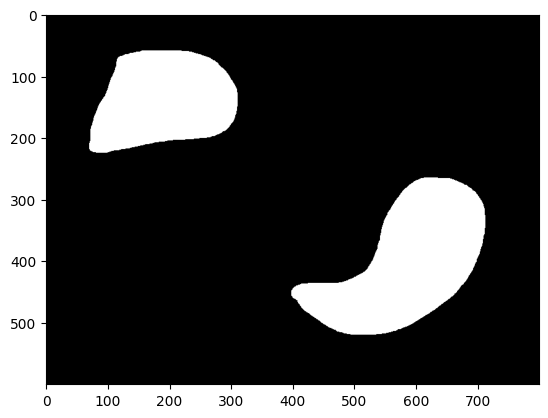

In [190]:
img = cv2.imread("images/shape11_2.png")

gray = cv2.imread("images/shape11_2.png",0)
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold)
#print(len(contours))
#print(contours[0])

In [204]:
@timer
@numba.jit(parallel = True)
def min_contours_distance_numba(contour1 :np.array , contour2 :np.array) -> (np.array,np.array) :
    
    minDistace = np.empty(len(contour1), dtype = np.float32)
    pointIndex = np.empty(len(contour1), dtype = np.float32)

    x_2 = contour2[: ,0, 0]        
    y_2 = contour2[: ,0, 1]
    for i in numba.prange(len(contour1)):
        x = contour1[i,0,0]
        y = contour1[i,0,1]
        
        diff_x = x  - x_2
        diff_y = y  - y_2
        
        dis = diff_x*diff_x + diff_y* diff_y
        minDistace[i] = np.sqrt(np.amin(dis)) # Tim maximum distance -> np.amax()
        pointIndex[i] = np.argmin(dis)        # Tim maximum distance -> np.argmax()

    return minDistace,pointIndex

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\4064997238.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(parallel = True)


In [227]:
print(contours[0].shape)

(1035, 1, 2)


In [228]:
min_distance, pointIndex = min_contours_distance_numba(contours[0],contours[1])

index_point_contour1 = np.argmin(min_distance)
index_point_contour2 = int(pointIndex[index_point_contour1])

print(index_point_contour1)
print(index_point_contour2)
# (406, 440), (282, 193)

Function min_contours_distance_numba took: 0.0 (us)
277
12


In [223]:
point1 = contours[0][index_point_contour1].tolist()[0]
point2 = contours[1][index_point_contour2].tolist()[0]
print(point1)
print(point2)

[406, 440]
[282, 193]


### Draw result

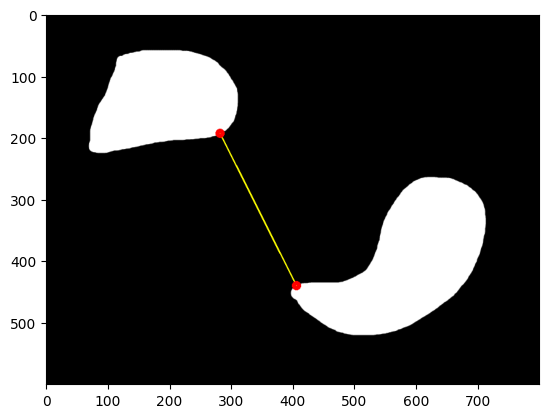

In [6]:
img_copy = img.copy()

cv2.line(img_copy, tuple(point1), tuple(point2), (0,255,255), 2)
cv2.circle(img_copy , tuple(point1), 4, (0,0,255), 6)
cv2.circle(img_copy , tuple(point2), 4, (0,0,255), 6)

showC(img_copy)

# SpeedUp Minnimum Distance from Point to Contours

1035
24


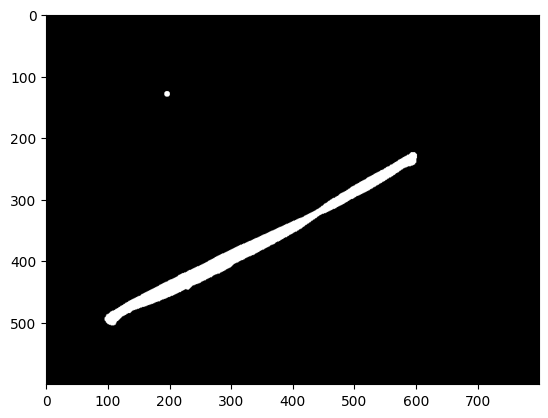

In [225]:
img = cv2.imread("images/shape11_1.png")

gray = cv2.imread("images/shape11_1.png",0)
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold)
print(len(contours[0]))
print(len(contours[1]))

In [231]:
moments = cv2.moments(contours[1])
center_x = moments["m10"] / moments["m00"]
center_y = moments["m01"] / moments["m00"]
print(center_x, center_y)
point  = np.array([[[center_x,center_y]]])
print(point.shape)

196.0 129.0
(1, 1, 2)


In [233]:
min_distance, pointIndex = min_contours_distance_numba(point,contours[0])

index_point_contour1 = np.argmin(min_distance)
index_point_contour2 = int(pointIndex[index_point_contour1])

print(index_point_contour1)
print(index_point_contour2)

point2 =  contours[0][index_point_contour2]
print(point2)
point2[0][0]

Function min_contours_distance_numba took: 996.3512 (us)
0
277
[[315 374]]


315

### Draw Result

(196, 129) (315, 374)


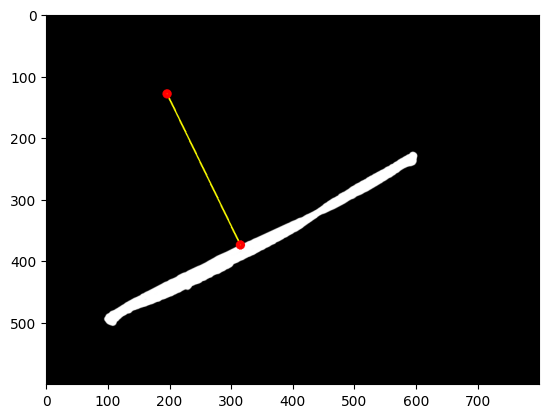

In [234]:
img_copy = img.copy()
point_a =  (int(center_x), int(center_y))

point_b= (int(point2[0][0]), int(point2[0][1]))
print(point_a, point_b)
cv2.line(img_copy, tuple(point_a), tuple(point_b), (0,255,255), 2)
cv2.circle(img_copy , point_a, 4, (0,0,255), 6)
cv2.circle(img_copy , point_b, 4, (0,0,255), 6)

showC(img_copy)

# SpeedUp Connections Functions

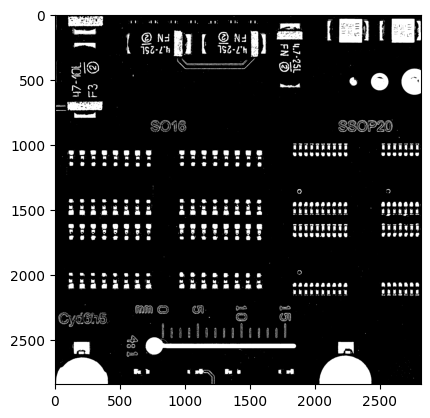

In [238]:
img = cv2.imread("images/BOARD2.jpg")
gray = cv2.imread("images/BOARD2.jpg",0)

_,threshold = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

show(threshold)

In [299]:
# Discard Object (_)
t0 = time.time()
result = SelectShape(threshold, 0,20000, feature= "area")
print(len(result[0]))
t1 = time.time()
print(f'Time: {(t1-t0)} (s)')

2627
Time: 0.0285186767578125 (s)


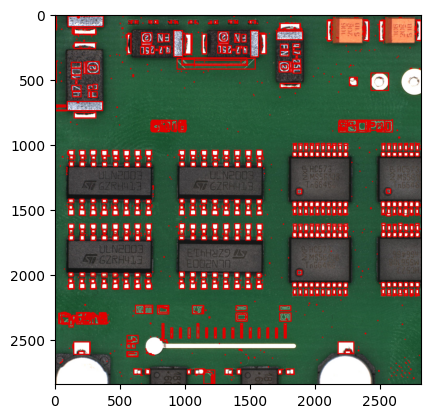

In [300]:
img_copy = img.copy()

for x, y, w, h in zip(result[0], result[1], result[2], result[3]):
    top_left = (x, y)
    bottom_right = (x+w, y+h)
    cv2.rectangle(img_copy,top_left, bottom_right, (0,0,225), 8)
showC(img_copy)

# SpeedUp Polar Transformations

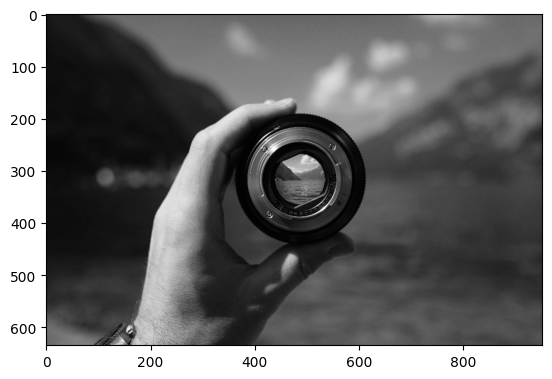

In [307]:
img = cv2.imread("images/lens.png")
gray = cv2.imread("images/lens.png",0 )
show(gray)

In [327]:
@timer
@numba.jit(parallel = True)
def polar_transfrom(img):
    
    height, width = img.shape[0] , img.shape[1]
    
    max_r = int(math.sqrt((height/2)**2 + (width/2)**2)) + 20
    print(f'max r: {max_r}')
    
    center_x = width // 2 
    center_y = height // 2 
    theta = 360
    polar_space = np.zeros((max_r, theta), dtype=np.int16)
    
    for the in numba.prange(theta):
        for r in numba.prange(max_r*2):
            
            x = int(center_x +  r * np.cos(np.radians(the)))
            y = int(center_y +  r * np.sin(np.radians(the)))
            
            if 0 <= x <width and 0 <= y < height:
                
                polar_space[r,the] = img[y, x]
            
    
    return polar_space.astype(np.uint8)

def polar_to_2d(r, theta,center):
    center_x = center[0]
    center_y = center[1]
    
    x = int(center_x +  r * np.cos(np.radians(theta)))
    y = int(center_y +  r * np.sin(np.radians(theta)))
    
    return x, y

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\1517872586.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(parallel = True)


max r: 592
Function polar_transfrom took: 998.2586 (us)


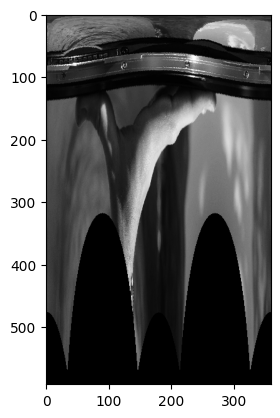

In [332]:
polar = polar_transfrom(gray)
show(polar)

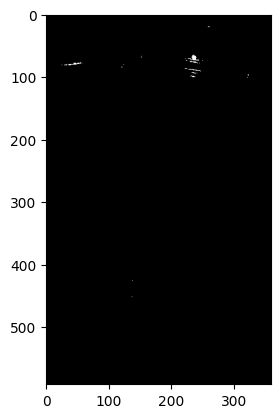

In [334]:
_,threshold = cv2.threshold(polar, 240, 255, cv2.THRESH_BINARY)
show(threshold)

# SpeedUp Emphaize Function

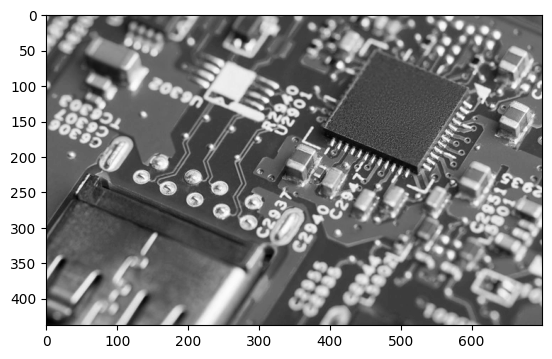

In [336]:
gray = cv2.imread("images/chip3.png",0)
show(gray)

### Using Scalar

In [342]:
@timer
def emphasize_scalar(img, kernel_size = (3,3), c = 1.0):
    
    height, width = img.shape[0], img.shape[1]
    
    emphasize_space  = np.zeros((img.shape[0], img.shape[1]),dtype = np.float16)
    k_height, k_width  = kernel_size

    for y in range(height - k_height ):
        for x in range(width - k_width):
            
            crop  = img[y : y + k_height , x: x + k_width]
            mean_value = np.mean(crop)
            for j in range(k_height):
                for i in range(k_width):

                    ori = int(img[y+j ,x+i])
                    
                    new_value = int((ori-mean_value) *  c) + ori

                    if new_value <=0 :
                        new_value = 0
                        
                    elif new_value >=255 :
                        new_value = 255
                        
                    emphasize_space[y : y+j , x: x+i] = new_value
                    
    emphasize_space[emphasize_space<=0] = 0
    emphasize_space[emphasize_space>=255] = 255
    
    return emphasize_space.astype(np.uint8)

Function emphasize_scalar took: 7839.998722 (ms)


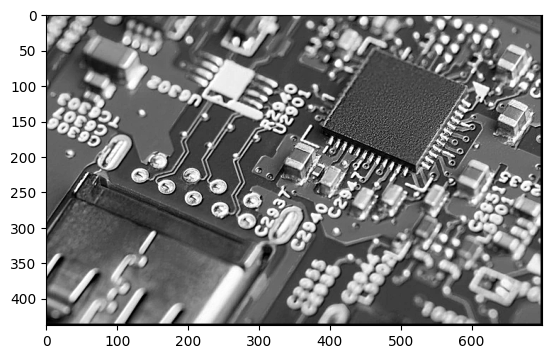

In [343]:
image_emphasize = emphasize_scalar(gray, (3,3), 1.2)
show(image_emphasize)

### Using numpy

In [345]:
@timer
def emphasize_numpy(img, kernel_size = (3,3), c = 1.0):
    
    height, width = img.shape[0], img.shape[1]
    
    emphasize_space  = np.zeros((img.shape[0], img.shape[1]),dtype = np.float16)
    k_height, k_width  = kernel_size

    for y in range(height - k_height ):
        for x in range(width - k_width):
            
            crop  = img[y : y + k_height , x: x + k_width]
            mean_value = np.mean(crop)
            emphasize_space[y : y + k_height ,x: x + k_width] = (crop - mean_value)*c + crop
            
    emphasize_space[emphasize_space<=0] = 0
    emphasize_space[emphasize_space>=255] = 255
    
    return emphasize_space.astype(np.uint8)

Function emphasize_numpy took: 4969.529629 (ms)


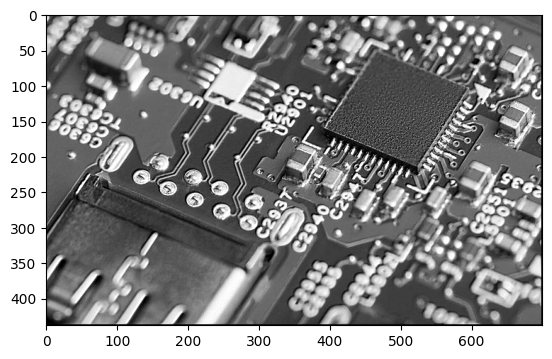

In [356]:
image_emphasize = emphasize_numpy(gray, (3,3), 1.2)
show(image_emphasize)

### Using Numba.jit(parallel = True)

In [351]:
@timer
@numba.jit( parallel = True)
def emphasize_jit(img, kernel_size = 3, c = 1.0):
    
    height, width = img.shape[0], img.shape[1]
    
    emphasize_space  = np.zeros((img.shape[0], img.shape[1]),dtype = np.float64)
    k_height, k_width  = kernel_size ,kernel_size

    for y in numba.prange(height - k_height ):
        for x in numba.prange(width - k_width):
            
            crop  = img[y : y + k_height , x: x + k_width]
            
            emphasize_space[y : y + k_height ,x: x + k_width] = (crop - np.mean(crop))*c + crop
            
    np.clip(emphasize_space, 0, 255, out=emphasize_space)
    
    return emphasize_space.astype(np.uint8)

C:\Users\manmu\AppData\Local\Temp\ipykernel_14060\2147934223.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit( parallel = True)


Function emphasize_jit took: 1.998901 (ms)


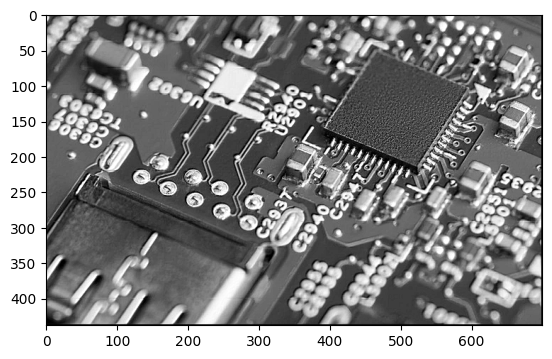

In [355]:
image_emphasize = emphasize_jit(gray, 3, 1.2)
show(image_emphasize)

# Package Building 

1. Create Folder : ```mkdir build```
2. Create src Folder and create file .py inside
    ```
        1. cd build
        2. mkdir src
    ```
3. Create file.py in the src folder
3. Config building in pyproject.toml
4. install python build: ```pip install build```
5. building: ```python -m build```
6. get the wheel file
7. install whl file ```pip install file.whl```
